In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx

In [2]:
df = pd.DataFrame({'From': ['O', 'O', 'O',
                            'A', 'A', 'A', 
                            'B', 'B', 'B', 'B', 'B',
                            'C', 'C', 'C',
                            'D', 'D', 'D', 'D',
                            'E', 'E', 'E', 'E',
                            'T', 'T'],
                   'To':['A', 'B', 'C',
                         'O', 'B', 'D',
                         'O', 'A', 'C', 'D', 'E',
                         'O', 'B', 'E',
                         'A', 'B', 'E', 'T',
                         'B', 'C', 'D', 'T',
                         'D', 'E'],
                   'Cost': [2, 5, 4,
                            2, 2, 7, 
                            5, 2, 1, 4, 3, 
                            4, 1, 4,
                            7, 4, 1, 5,
                            3, 4, 1, 7,
                            5, 7],
                   #'Capacity':
                  })

In [3]:
temp_window = networkx.Graph()
temp_window = networkx.from_pandas_edgelist(df, 'From', 'To')

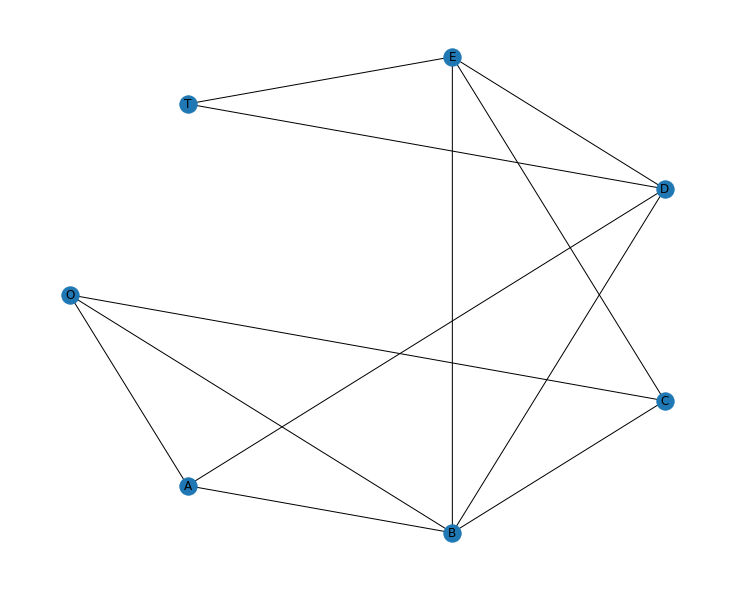

In [4]:
plt.figure(figsize=(10, 8))
networkx.draw_shell(temp_window, with_labels=True)

  From To Cost
0    O  A    2
1    A  B    2
2    B  C    1
3    B  E    3
4    E  D    1
5    D  T    5


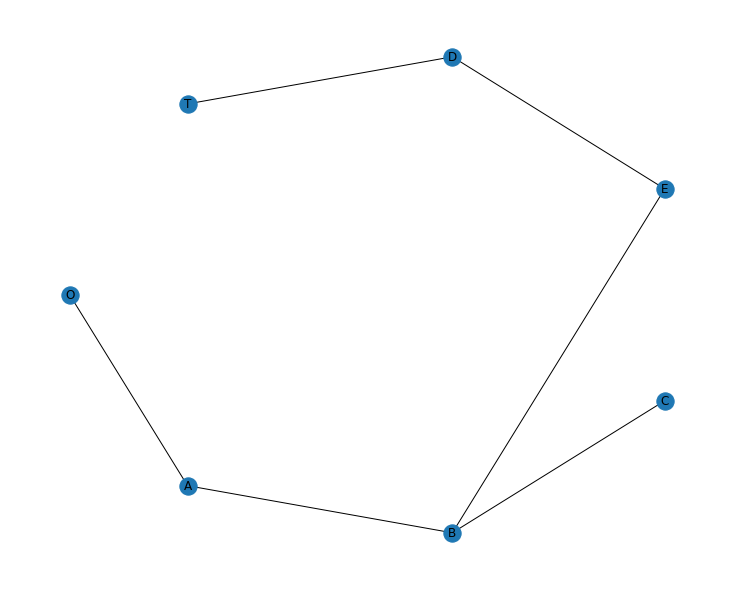

In [71]:
# Spanning Tree algorithm implementation

def spanning_tree(df, start_node, end_node):
    # Initialize a copy dataframe
    df_copy = df.copy(deep=True)
    
    # Initialize a new dataframe that has the lowest connection cost
    df_new = df_copy.loc[df_copy['From'] == start_node].copy(deep=True)
    df_new = df_new.iloc[df_new['Cost'].argmin()]
    
    final_df = pd.DataFrame(df_new)
    final_df = final_df.transpose()
    
    #print(final_df)
    
    # Aux function for adding nodes to used pool
    def add_pool(pool, target):
        new_pool = pool.append
    
    # Check the unique nodes across the entire dataframe
    origin_nodes = df_copy['From'].unique()
    end_nodes = df_copy['To'].unique()
    
    unique_nodes = pd.DataFrame({'node': np.concatenate((origin_nodes,
                                                         end_nodes))})['node'].unique()
    
    # Aux function for determining remaining unused nodes
    def remove_pool(pool, target):
        new_pool = pool[pool != target]
        return new_pool
    
    # Check new connections
    def add_pool(pool, target):
        pool.append(target)
        return pool
    
    def plot_graph(df):
        temp_window = networkx.Graph()
        temp_window = networkx.from_pandas_edgelist(df, 'From', 'To')
        
        plt.figure(figsize=(10, 8))
        networkx.draw_shell(temp_window, with_labels=True)
        return
        

    # Used pool - add the origin and first connection
    used_pool = [start_node]
    used_pool = add_pool(used_pool, df_new['To'])
    
    # Need to take out the first two - origin and first connection
    remaining_pool = unique_nodes
    remaining_pool = remove_pool(remaining_pool, start_node)
    remaining_pool = remove_pool(remaining_pool, df_new['To'])
    
    # Also need to remove from the connections
    current_connections = df_copy.copy(deep=True)
    current_connections = current_connections.loc[current_connections['To'] != start_node]
    current_connections = current_connections.loc[current_connections['To'] != df_new['To']]
    
    # The possible connections right now
    available_connections = pd.DataFrame({})
    available_connections = available_connections.append(
        current_connections.loc[current_connections['From'] == start_node])
    available_connections = available_connections.append(
        current_connections.loc[current_connections['From'] == df_new['To']])
    
    # Iterate through the un-connected nodes
    while len(remaining_pool) > 0:
        # Get the next node to explore
        next_node = available_connections.iloc[available_connections['Cost'].argmin()]
        
        # Update the explored path dataframe
        final_df = final_df.append(pd.DataFrame({'From': next_node['From'],
                                                 'To': next_node['To'],
                                                 'Cost':next_node['Cost']}, index=[0]))
        
        # Update pools
        used_pool = add_pool(used_pool, next_node['To'])
        remaining_pool = remove_pool(remaining_pool, next_node['To'])
        
        # Update the possible connections
        current_connections = current_connections.loc[current_connections['To'] != next_node['To']]
        
        # Remove from available connections the new ending node
        available_connections = available_connections.loc[
            available_connections['To'] != next_node['To']]
        
        # Update the starting connection points
        available_connections = available_connections.append(
            current_connections.loc[current_connections['From'] == next_node['To']])
        
    # Clean up the dataframe
    final_df.reset_index(inplace=True)
    final_df.drop('index', axis=1, inplace=True)
    
    # Do outputs
    print(final_df)
    plot_graph(final_df)
    
    return
    
spanning_tree(df, 'O', 'T')